In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [16]:
data = pd.read_csv(r"C:\Users\2023\PycharmProjects\pythonProject\.venv\etc\Sanji_Project\DataFrame\Modify_World_Oil_price.csv")
data

,Date,Open,High,Low,Close,Volume
0,2015-01-02,53.759998,55.110001,52.029999,52.689999,268708.0
1,2015-01-05,52.610001,52.730000,49.680000,50.040001,375782.0
2,2015-01-06,50.000000,50.369999,47.549999,47.930000,451642.0
3,2015-01-07,48.000000,49.310001,46.830002,48.650002,460083.0
4,2015-01-08,48.779999,49.650002,47.730000,48.790001,362081.0
...,...,...,...,...,...,...
2509,2024-12-24,69.559998,70.430000,69.360001,70.099998,122602.0
2510,2024-12-26,70.199997,70.750000,69.330002,69.620003,144877.0
2511,2024-12-27,69.680000,70.750000,69.440002,70.599998,172641.0
2512,2024-12-30,70.419998,71.559998,70.120003,70.989998,199296.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2514 non-null   object 
 1   Open    2514 non-null   float64
 2   High    2514 non-null   float64
 3   Low     2514 non-null   float64
 4   Close   2514 non-null   float64
 5   Volume  2514 non-null   float64
dtypes: float64(5), object(1)
memory usage: 118.0+ KB


In [18]:
data.describe()

,Open,High,Low,Close,Volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,62.034833,63.103329,60.890891,62.001452,4.622946e+05
std,18.082310,18.327800,17.844347,18.116223,2.163843e+05
min,-14.000000,13.690000,-40.320000,-37.630001,0.000000e+00
25%,48.592500,49.312501,47.750000,48.520000,3.153390e+05
50%,59.985001,60.815001,58.934999,59.949999,4.231695e+05
75%,74.054998,75.250000,72.920000,74.025002,6.008952e+05
max,124.660004,130.500000,120.790001,123.699997,2.288230e+06


In [19]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

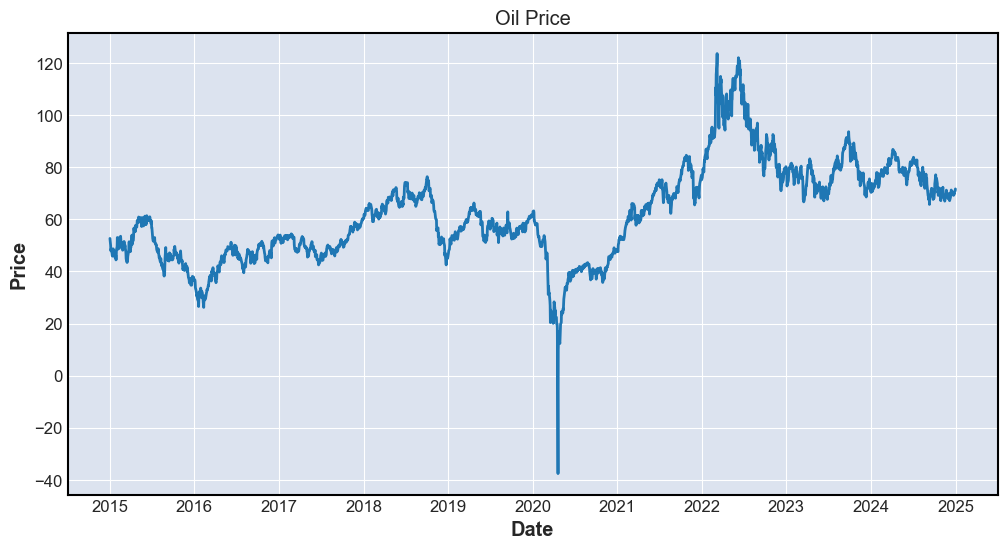

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

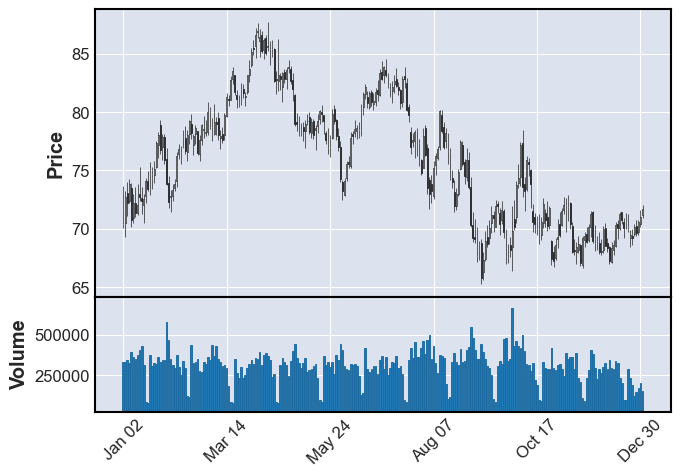

In [22]:
mpf.plot(data.loc['2024/1/1':'2025/1/1'], type='candle', volume=True)
plt.show()

In [23]:
data.loc['2020/4/20':'2020/4/21']

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-20,17.73,17.85,-40.32,-37.630001,247947.0
2020-04-21,-14.00,13.86,-16.74,10.010000,2288230.0


In [24]:
x = data[(data['Low'] < 10)].index
data.drop(x, inplace=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,53.759998,55.110001,52.029999,52.689999,268708.0
2015-01-05,52.610001,52.730000,49.680000,50.040001,375782.0
2015-01-06,50.000000,50.369999,47.549999,47.930000,451642.0
2015-01-07,48.000000,49.310001,46.830002,48.650002,460083.0
2015-01-08,48.779999,49.650002,47.730000,48.790001,362081.0
...,...,...,...,...,...
2024-12-24,69.559998,70.430000,69.360001,70.099998,122602.0
2024-12-26,70.199997,70.750000,69.330002,69.620003,144877.0
2024-12-27,69.680000,70.750000,69.440002,70.599998,172641.0


In [25]:
data.loc['2020/4/15':'2020/4/25']

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-15,20.719999,20.889999,19.200001,19.870001,544797.0
2020-04-16,20.150000,20.530001,19.420000,19.870001,350942.0
2020-04-17,20.000000,20.219999,17.309999,18.270000,240628.0
2020-04-22,13.120000,16.180000,10.260000,13.780000,1235218.0
2020-04-23,14.200000,18.260000,13.350000,16.500000,833584.0
2020-04-24,16.780001,17.969999,15.640000,16.940001,600220.0


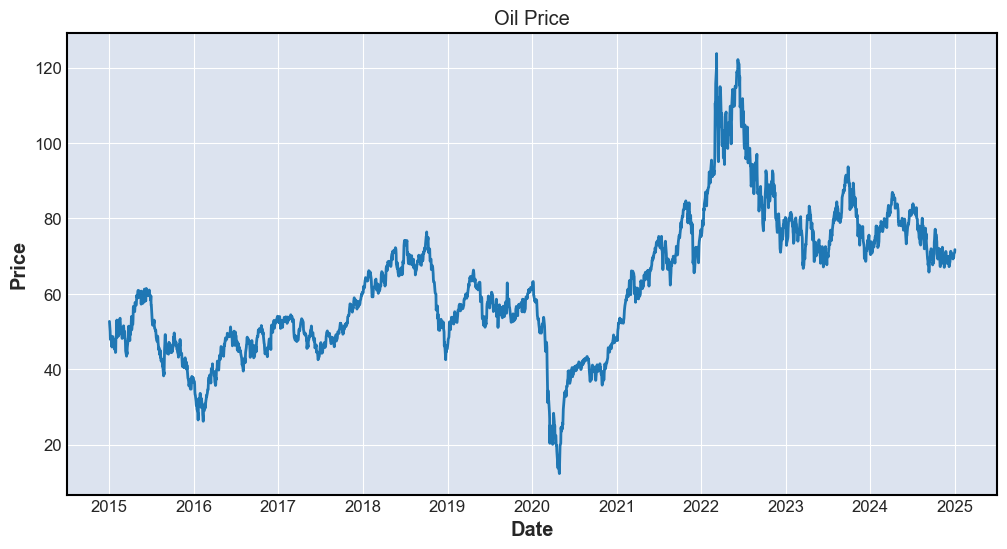

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

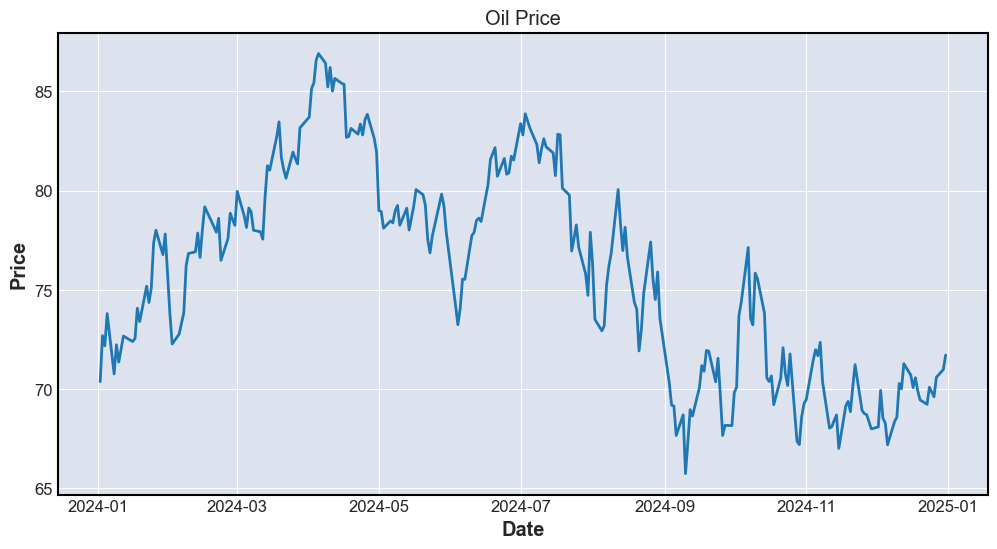

In [27]:
new_data = data.loc['2024/1/1':'2025/1/1']
plt.figure(figsize=(12, 6))
plt.plot(new_data['Close'])
plt.title('Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(new_data['Close'])

print('ADF Statistics:', results[0])
print('ADF p-value:', results[1])
print('Critical Values:')
for key, value in results[4].items():
    print(f" {key}: {value}")
    
if results[1] <= 0.05:
    print('reject H0')
else:
    print('accept H0 (non-stationary)')


ADF Statistics: -2.1375813004758766
ADF p-value: 0.22967384548301795
Critical Values:
 1%: -3.4566744514553016
 5%: -2.8731248767783426
 10%: -2.5729436702592023
accept H0 (non-stationary)


In [29]:
new_data['Price_diff'] = new_data['Close'].diff()
new_data = new_data.dropna(subset=['Price_diff'])
result_diff = adfuller(new_data['Price_diff'])

print("ADF Statistic (Diff):", result_diff[0])
print("p-value (Diff):", result_diff[1])
print("Critical Values (Diff):")
for key, value in result_diff[4].items():
    print(f" {key}: {value}")
    
if result_diff[1] <= 0.05:
    print('reject H0')
else:
    print('accept H0 (non-stationary)')

ADF Statistic (Diff): -8.544603108781335
p-value (Diff): 9.578351583868222e-14
Critical Values (Diff):
 1%: -3.457215237265747
 5%: -2.873361841566324
 10%: -2.5730700760129555
reject H0


C:\Users\2023\AppData\Local\Temp\ipykernel_1732\840218419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Price_diff'] = new_data['Close'].diff()


In [30]:
new_data

,Open,High,Low,Close,Volume,Price_diff
Date,,,,,,
2024-01-03,70.500000,73.230003,69.279999,72.699997,334861.0,2.320000
2024-01-04,73.040001,74.000000,71.059998,72.190002,344467.0,-0.509995
2024-01-05,72.400002,74.239998,72.209999,73.809998,325525.0,1.619995
2024-01-08,73.510002,73.949997,70.129997,70.769997,392249.0,-3.040001
2024-01-09,70.910004,72.930000,70.470001,72.239998,363445.0,1.470001
...,...,...,...,...,...,...
2024-12-24,69.559998,70.430000,69.360001,70.099998,122602.0,0.860001
2024-12-26,70.199997,70.750000,69.330002,69.620003,144877.0,-0.479996
2024-12-27,69.680000,70.750000,69.440002,70.599998,172641.0,0.979996


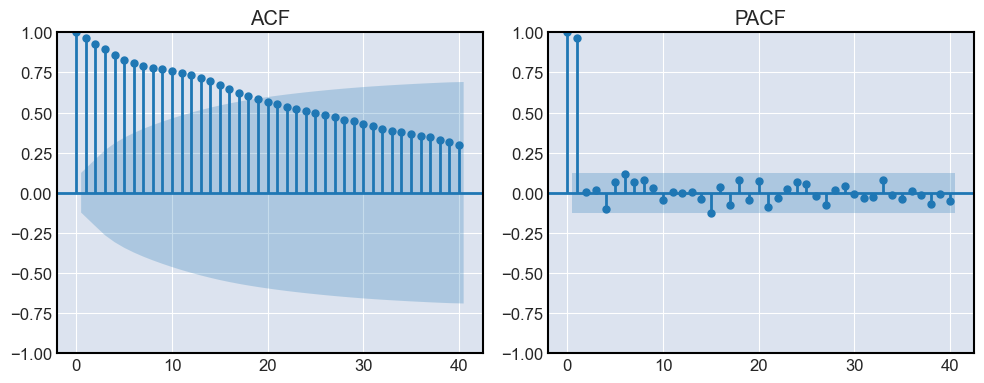

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_acf(new_data['Close'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF')

plt.subplot(1, 2, 2)
plot_pacf(new_data['Close'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()

In [32]:
import itertools 
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

p = range(0, 3)
d = [1]
q = range(0, 3)
pdq_combinations = list(itertools.product(p, d, q))

results = []

for param in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(new_data['Close'].dropna(), order=param)
        result = model.fit()
        results.append((param, result.aic, result.bic))
        print(f'ARIMA{param} - AIC: {result.aic:.2f} - BIC: {result.bic:.2f}')
    except:
        continue
        
best_model = sorted(results, key=lambda x: x[1])[0]
print(f"best model: \n ARIMA{best_model[0]} - AIC: {best_model[1]:.2f}, BIC: {best_model[2]:.2f}")

ARIMA(0, 1, 0) - AIC: 861.72 - BIC: 865.24
ARIMA(0, 1, 1) - AIC: 863.46 - BIC: 870.51
ARIMA(0, 1, 2) - AIC: 865.24 - BIC: 875.81
ARIMA(1, 1, 0) - AIC: 863.48 - BIC: 870.52
ARIMA(1, 1, 1) - AIC: 862.19 - BIC: 872.75
ARIMA(1, 1, 2) - AIC: 864.05 - BIC: 878.14
ARIMA(2, 1, 0) - AIC: 865.24 - BIC: 875.80
ARIMA(2, 1, 1) - AIC: 866.75 - BIC: 880.83
ARIMA(2, 1, 2) - AIC: 861.39 - BIC: 878.99
best model: 
 ARIMA(2, 1, 2) - AIC: 861.39, BIC: 878.99


In [33]:
train_size = int(len(new_data['Close']) * 0.8)
train, test = new_data.iloc[:train_size], new_data.iloc[train_size:]

best_pdq = best_model[0]
model = sm.tsa.ARIMA(train['Close'].dropna(), order=best_pdq)
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  200
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -344.434
Date:                Sun, 29 Jun 2025   AIC                            698.867
Time:                        19:43:51   BIC                            715.334
Sample:                             0   HQIC                           705.532
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0171      0.053     -0.324      0.746      -0.120       0.086
ar.L2          0.9525      0.050     19.219      0.000       0.855       1.050
ma.L1          0.0004    651.119   5.44e-07      1.0

In [34]:
forecast = result.forecast(steps=len(test))
print(forecast)

200    70.894597
201    71.014012
202    71.225903
203    71.336027
204    71.535971
205    71.637450
206    71.826163
207    71.919599
208    72.097752
209    72.183708
210    72.351930
211    72.430930
212    72.589811
213    72.662346
214    72.812441
215    72.878967
216    73.020796
217    73.081741
218    73.215791
219    73.271552
220    73.398282
221    73.449230
222    73.569070
223    73.615551
224    73.728904
225    73.771242
226    73.878488
227    73.916983
228    74.018477
229    74.053411
230    74.149486
231    74.181120
232    74.272091
233    74.300669
234    74.386831
235    74.412580
236    74.494209
237    74.517341
238    74.594697
239    74.615410
240    74.688737
241    74.707214
242    74.776742
243    74.793155
244    74.859100
245    74.873606
246    74.936171
247    74.948920
248    75.008295
249    75.019425
250    75.075788
Name: predicted_mean, dtype: float64


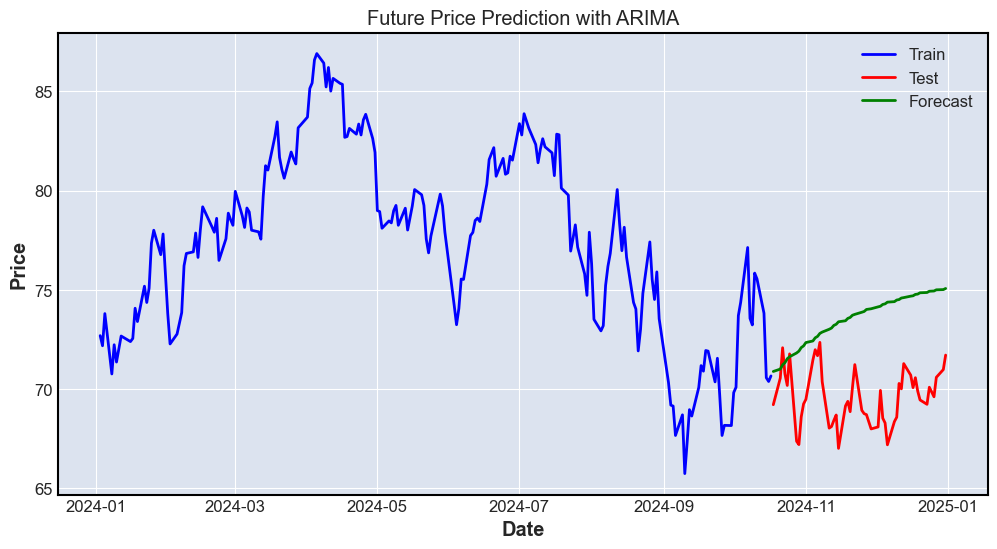

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='red')
plt.plot(test.index, forecast, label='Forecast', color='green')

# plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast,              label='Forecast Price', color='red', linestyle='dashed')
plt.legend()
plt.title('Future Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

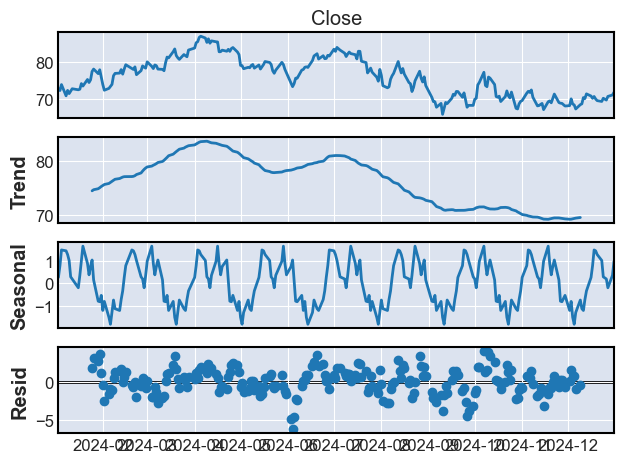

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(new_data['Close'], model='additive', period=30).plot()
plt.show()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_2 = SARIMAX(new_data['Close'], order=(2,1,2), seasonal_order=(2,1,2,30))
result_2 = model_2.fit()
print(result_2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 30)   Log Likelihood                -404.883
Date:                            Sun, 29 Jun 2025   AIC                            827.766
Time:                                    19:44:11   BIC                            858.309
Sample:                                         0   HQIC                           840.100
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2702     19.693      0.014      0.989     -38.327      38.867
ar.L2          0.3829     15.018   

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_2 = SARIMAX(new_data['Close'], order=(2,1,2), seasonal_order=(2,1,2,30))
result_2 = model_2.fit()

forecast_2 = result_2.forecast(steps=len(test))
print(forecast_2)

251    72.653983
252    71.613538
253    71.106102
254    72.002029
255    72.248588
256    71.126825
257    69.829709
258    69.838152
259    69.992624
260    69.219117
261    69.884493
262    69.636416
263    69.090142
264    69.217259
265    70.060199
266    68.972078
267    69.150508
268    69.677750
269    70.233047
270    70.570732
271    71.104612
272    71.775370
273    71.282401
274    71.415084
275    70.709625
276    70.078194
277    70.007696
278    69.966980
279    70.315347
280    70.607450
281    71.385328
282    71.056934
283    70.515567
284    71.104928
285    71.586458
286    70.441464
287    69.617925
288    69.648789
289    69.682607
290    69.125510
291    69.804803
292    69.047568
293    68.720609
294    68.868312
295    69.590396
296    69.325726
297    69.757210
298    70.016391
299    70.639466
300    70.888512
301    70.981983
Name: predicted_mean, dtype: float64


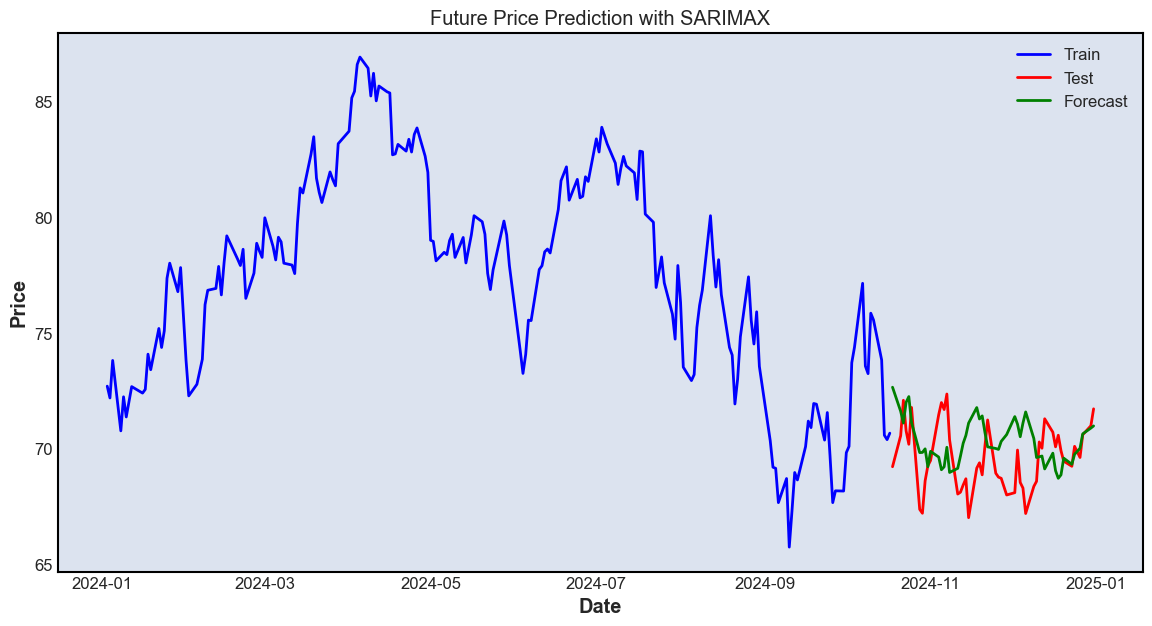

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='red')
plt.plot(test.index, forecast_2, label='Forecast', color='green')
plt.legend()
plt.title('Future Price Prediction with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

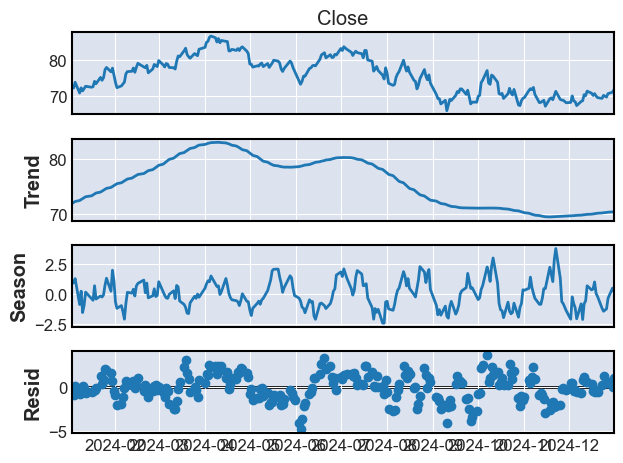

In [40]:
from statsmodels.tsa.seasonal import STL

stl = STL(new_data['Close'], period=30)
res = stl.fit()
res.plot()
plt.show()

Ljung_Box Test: 
      lb_stat  lb_pvalue
10  0.583608   0.999986
ARCH Test: - p-value: 0.0006
AR roots modulus: [1.01571165 1.03363596]
MA roots modulus: [1.00000019 1.00035452]


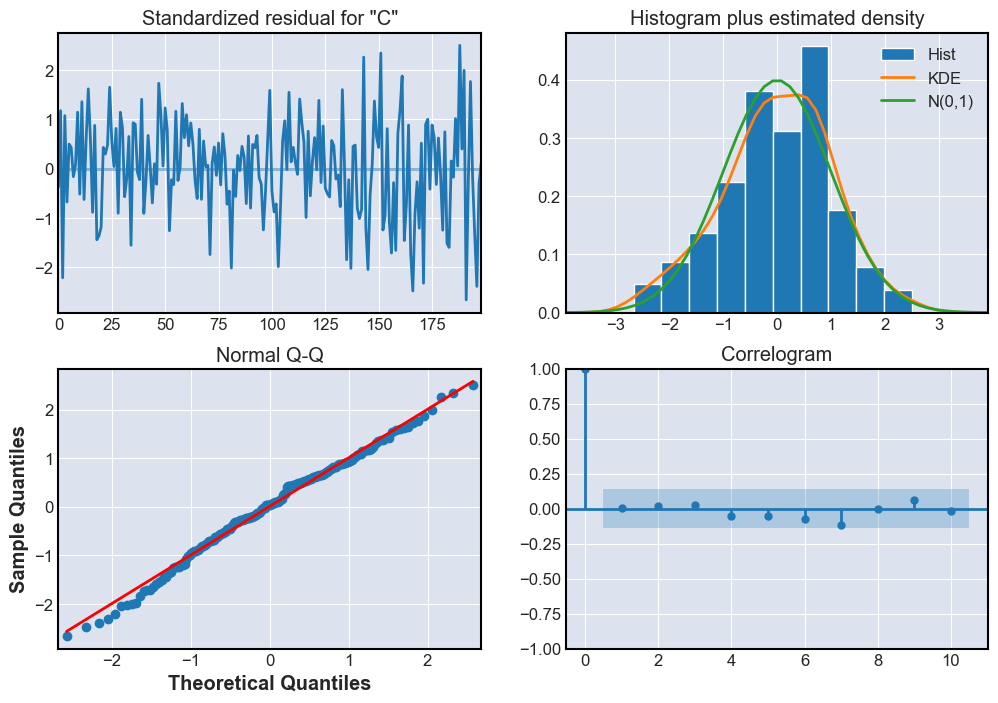

In [41]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(result.resid, lags=[10], return_df=True)
print("Ljung_Box Test: \n", ljung_box)

from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(result.resid)
print(f"ARCH Test: - p-value: {arch_test[1]:.4f}")

ar_roots = result.arroots
ma_roots = result.maroots
print("AR roots modulus:", abs(ar_roots))
print("MA roots modulus:", abs(ma_roots))

result.plot_diagnostics(figsize=(12, 8))
plt.show()

Ljung_Box Test: 
      lb_stat  lb_pvalue
10  1.078841   0.999756
ARCH Test: - p-value: 1.0000


NameError: name 'plot_roots' is not defined

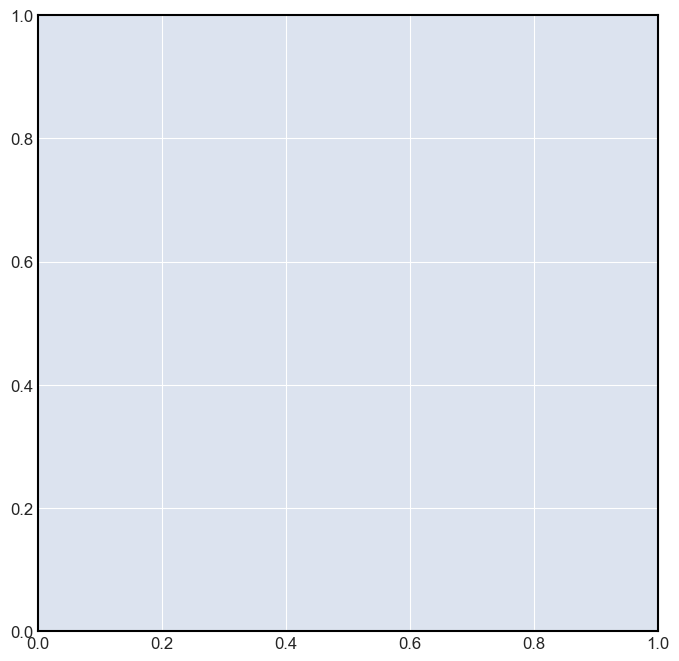

In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(result_2.resid, lags=[10], return_df=True)
print("Ljung_Box Test: \n", ljung_box)

from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(result_2.resid)
print(f"ARCH Test: - p-value: {arch_test[1]:.4f}")

ar_roots = result_2.arroots
ma_roots = result_2.maroots
# print("AR roots modulus:", abs(ar_roots))
# print("MA roots modulus:", abs(ma_roots))

plt.show()

result_2.plot_diagnostics(figsize=(10, 6))
plt.show()